In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 158M/163M [00:03<00:00, 54.5MB/s]
100% 163M/163M [00:03<00:00, 49.3MB/s]


In [4]:
!unzip face-mask-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
import os

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [7]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


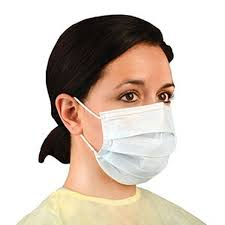

In [8]:
image_path = '/content/data/with_mask/' + with_mask_files[0]
image = cv2.imread(image_path)
cv2_imshow(image)

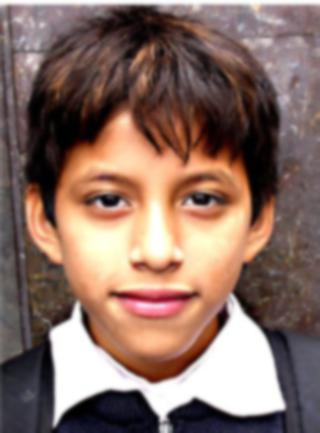

In [9]:
image_path = '/content/data/without_mask/' + without_mask_files[0]
image = cv2.imread(image_path)
cv2_imshow(image)

In [10]:
!mkdir processed_data

In [11]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
with_mask_labels = [1]* len(with_mask_files)
without_mask_labels = [0]* len(without_mask_files)

In [14]:
labels = with_mask_labels + without_mask_labels

In [15]:
len(labels)

7553

In [16]:
type(data)

list

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
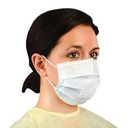

In [17]:
data[0]

In [18]:
X = np.array(data)
y = np.array(labels)

In [19]:
print(X[7])

[[[228 214 186]
  [228 214 186]
  [228 215 187]
  ...
  [122 128 104]
  [122 128 104]
  [122 128 104]]

 [[235 224 202]
  [235 225 202]
  [236 225 202]
  ...
  [185 183 155]
  [186 183 155]
  [186 183 155]]

 [[209 203 190]
  [212 206 194]
  [219 212 199]
  ...
  [226 216 187]
  [226 216 187]
  [226 216 187]]

 ...

 [[ 43  44  61]
  [ 43  44  61]
  [ 43  43  61]
  ...
  [ 42  42  52]
  [ 43  43  53]
  [ 46  46  56]]

 [[ 45  46  64]
  [ 45  46  64]
  [ 44  45  63]
  ...
  [ 39  39  49]
  [ 41  41  51]
  [ 44  44  54]]

 [[ 47  48  66]
  [ 46  47  65]
  [ 46  47  66]
  ...
  [ 41  41  51]
  [ 43  43  53]
  [ 45  45  55]]]


In [20]:
print(X[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train = X_train/255
X_test = X_test/255

In [24]:
X_train[0]

array([[[0.22745098, 0.23921569, 0.2627451 ],
        [0.15294118, 0.16470588, 0.18823529],
        [0.54901961, 0.55686275, 0.57254902],
        ...,
        [0.13333333, 0.1372549 , 0.08235294],
        [0.11764706, 0.12156863, 0.06666667],
        [0.12156863, 0.1254902 , 0.07058824]],

       [[0.25098039, 0.2627451 , 0.29411765],
        [0.19215686, 0.20392157, 0.22745098],
        [0.59215686, 0.6       , 0.61960784],
        ...,
        [0.12941176, 0.13333333, 0.07843137],
        [0.13333333, 0.1372549 , 0.08235294],
        [0.12941176, 0.13333333, 0.07843137]],

       [[0.26666667, 0.2745098 , 0.31764706],
        [0.21960784, 0.23137255, 0.2627451 ],
        [0.41176471, 0.41960784, 0.44705882],
        ...,
        [0.12156863, 0.12156863, 0.06666667],
        [0.16078431, 0.15686275, 0.10588235],
        [0.16862745, 0.16470588, 0.11372549]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [26]:
model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [30]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - acc: 0.7077 - loss: 0.6039 - val_acc: 0.8959 - val_loss: 0.2848
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8769 - loss: 0.3057 - val_acc: 0.8694 - val_loss: 0.2837
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8976 - loss: 0.2531 - val_acc: 0.9190 - val_loss: 0.2408
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9213 - loss: 0.1984 - val_acc: 0.9223 - val_loss: 0.2216
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9260 - loss: 0.1900 - val_acc: 0.9058 - val_loss: 0.2467
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9401 - loss: 0.1540 - val_acc: 0.9322 - val_loss: 0.2489
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9574 - loss: 0.1123 - val_acc: 0.9240 - val_loss: 0.2303
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9581 - loss: 0.1114 - val_acc: 0.9372 - val_loss: 0.2461
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9359 - loss: 0.2113


In [32]:
print(loss)
print(accuracy)

0.22811515629291534
0.9371277093887329


Enter Path of the image/content/without3.jpeg


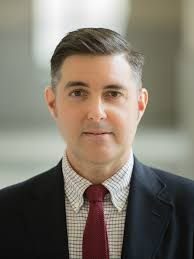

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.43804199 0.46724388]]
The person is wearing mask


In [37]:
image_path = input('Enter Path of the image')
image = cv2.imread(image_path)
cv2_imshow(image)
image = cv2.resize(image, (128,128))
image = image/255
image_reshaped = np.reshape(image, [1,128,128,3])
prediction = model.predict(image_reshaped)
print(prediction)
prediction = np.argmax(prediction)
if prediction == 1:
  print('The person is wearing mask')
else:
  print('The person is not wearing mask')

Enter Path of the image/content/with.png


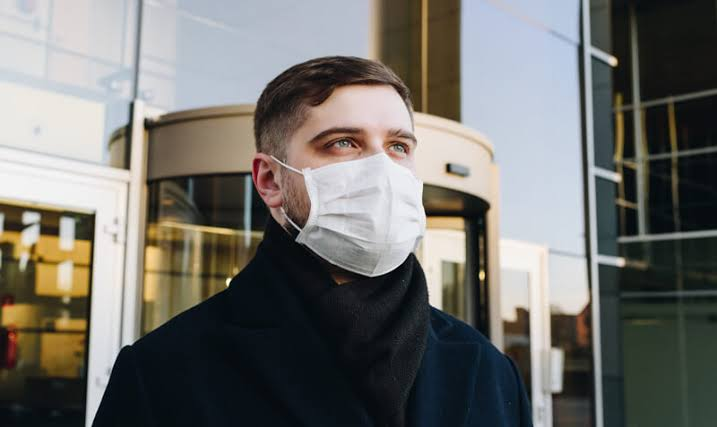

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.03431221 0.82934296]]
The person is wearing mask


In [34]:
image_path = input('Enter Path of the image')
image = cv2.imread(image_path)
cv2_imshow(image)
image = cv2.resize(image, (128,128))
image = image/255
image_reshaped = np.reshape(image, [1,128,128,3])
prediction = model.predict(image_reshaped)
print(prediction)
prediction = np.argmax(prediction)
if prediction == 1:
  print('The person is wearing mask')
else:
  print('The person is not wearing mask')

In [72]:
X[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])